# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [83]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [84]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

file_path = "data/km_year_power_price.csv"
lines = csv.reader(open(file_path, newline=''), delimiter=',')
dataset = list(lines)
dataset = np.array(dataset)
print("Dataset: \n", dataset)

#'km' 'year' 'powerPS' 'avgPrice'

kilometers = dataset[:,0]               #select rows of column "km"
kilometers = np.squeeze(kilometers)     #deletes empty dimension
kilometers = np.delete(kilometers, [0]) #deletes "km"
#another way:
#elementIndex = np.where(kilometers == "km")[0][0]
#kilometers = np.delete(kilometers, elementIndex)
kilometers = kilometers.astype(float) #converts to int
print("Kilometers: \n", kilometers, ", shape:", kilometers.shape)


years = dataset[:,1]               
years = np.squeeze(years)        
years = np.delete(years, [0])
years = years.astype(int)
print("Years: \n", years, ", shape:", years.shape)


powerPS = dataset[:,2]               
powerPS = np.squeeze(powerPS)        
powerPS = np.delete(powerPS, [0])
powerPS = powerPS.astype(float)
print("Power PS: \n", powerPS, ", shape:", powerPS.shape)

avgPrice = dataset[:,3]               
avgPrice = np.squeeze(avgPrice)     
avgPrice = np.delete(avgPrice, [0]) 
avgPrice = avgPrice.astype(float) 
print("Average price: \n", avgPrice, ", shape:", avgPrice.shape)



Dataset: 
 [['km' 'year' 'powerPS' 'avgPrice']
 ['125000' '2001' '40' '1371.11']
 ['150000' '2001' '40' '1298.70']
 ...
 ['20000' '2015' '260' '49492.38']
 ['10000' '2015' '300' '38542.69']
 ['20000' '2015' '300' '39683.32']]
Kilometers: 
 [125000. 150000.   5000. ...  20000.  10000.  20000.] , shape: (1297,)
Years: 
 [2001 2001 2001 ... 2015 2015 2015] , shape: (1297,)
Power PS: 
 [ 40.  40.  60. ... 260. 300. 300.] , shape: (1297,)
Average price: 
 [ 1371.11  1298.7   1232.43 ... 49492.38 38542.69 39683.32] , shape: (1297,)


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




intercept:  -3018309.484956958 | slope:  1509.093825335221
Correlation for price from year:  0.6767043169095441


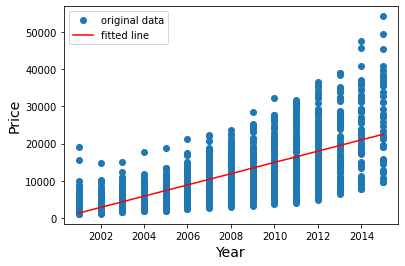

In [123]:
# linear regression with linregress (estimate price from year)
year_regression = stats.linregress(years, avgPrice)
year_slope = year_regression.slope
year_intercept = year_regression.intercept
year_correlation = year_regression.rvalue
print('intercept: ', year_intercept, '| slope: ', year_slope)
print("Correlation for price from year: ", year_correlation)

#with scikit linear regression object
regr = linear_model.LinearRegression()
years_reshaped = years.reshape(-1, 1)
avgPrice_reshaped = avgPrice.reshape(-1, 1)
regr.fit(years_reshaped, avgPrice_reshaped)

#"Should be as close as possible to abs(1)"
plt.plot(years, avgPrice, 'o', label = "original data")
plt.plot(years, year_intercept + year_slope * years, "r", label = 'fitted line')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize = 14)
plt.show()

In [86]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

In [87]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

In [88]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

intercept:  -1303.9126989879878 | slope:  90.33080718820227
Correlation for price from power:  0.7085500315263966


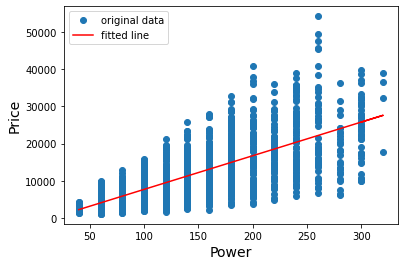

In [122]:
# linear regression with linregress (PRICE FROM POWER)
power_regression = stats.linregress(powerPS, avgPrice)
power_slope = power_regression.slope
power_intercept = power_regression.intercept
power_correlation = power_regression.rvalue
print('intercept: ', power_intercept, '| slope: ', power_slope)
print("Correlation for price from power: ", power_correlation)
plt.plot(powerPS, avgPrice, 'o', label = "original data")
plt.plot(powerPS, power_intercept + power_slope * powerPS, "r", label = 'fitted line')
plt.xlabel('Power', fontsize=14)
plt.ylabel('Price', fontsize = 14)
plt.legend()
plt.show()

intercept:  16692.34530251974 | slope:  -0.054251513309725684
Correlation for price from km:  -0.2572867429988498


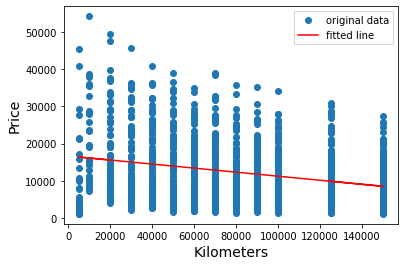

In [121]:
# linear regression with linregress (PRICE FROM KM)
km_regression = stats.linregress(kilometers, avgPrice)
km_slope = km_regression.slope
km_intercept = km_regression.intercept
km_correlation = km_regression.rvalue
print('intercept: ', km_intercept, '| slope: ', km_slope)
print("Correlation for price from km: ", km_correlation)


plt.plot(kilometers, avgPrice, 'o', label = "original data")
plt.plot(kilometers, km_intercept + km_slope*kilometers, "r", label = 'fitted line')
plt.legend()
plt.xlabel('Kilometers', fontsize=14)
plt.ylabel('Price', fontsize = 14)
plt.show()


In [91]:
# Have a look at the correlation coefficients to see which of the 3 features works better
correlation_factors = {
    "Correlation_for_km" : km_correlation,
    "Correlation_for_year" : year_correlation,
    "Correlation_for_power" : power_correlation
}
print(correlation_factors)

{'Correlation_for_km': -0.2572867429988498, 'Correlation_for_year': 0.6767043169095441, 'Correlation_for_power': 0.7085500315263966}


In [132]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)
years_listed = list(years)
years_array = np.array(years_listed)

power_listed = list(powerPS)
power_array = np.array(power_listed)

column_years_power = np.column_stack([years_array, power_array]) #has shape (1297,2)

regr = linear_model.LinearRegression()
regr.fit(column_years_power, avgPrice)

multiple_intercept = regr.intercept_
multiple_slope = regr.coef_
years_slope = two_dim_coefficients[0]
power_slope = two_dim_coefficients[1]
print('intercept: ', multiple_intercept,'| slope:' ,years_slope, power_slope)

y = multiple_intercept + (years_slope * years_array) + (power_slope * power_array)
print(y)
test = list(y)
print('prediction 1:' ,test[0], '| original price 1: ', avgPrice[0],'| difference: ', avgPrice[0] - test[0] )
error_vector = avgPrice - y

print(error_vector)

# So now the prediction is 
# Price = intercept + year_slope * years + power_slope * power
# y = q + mX1 + nX2 
# ... you just performed a multiple linear regression, time to celebrate




intercept:  -2661196.786749032 | slope: 1325.2284004046458 80.43004468885395
[-6197.55575178 -6197.55575178 -4588.954858   ... 30050.25168543
 33267.45347299 33267.45347299]
prediction 1: -6197.55575178148 | original price 1:  1371.11 | difference:  7568.665751781479
[ 7568.66575178  7496.25575178  5821.384858   ... 19442.12831457
  5275.23652701  6415.86652701]
